In [1]:
import pymongo
client = pymongo.MongoClient()
db = client["business"]
coll = db["yelp"]


In [2]:
# "business_id":'XDYnLQC8ViZejuCDp4eCwg' of stripsteak
projection = {"text":1}
cur = coll.find({"business_id":'XDYnLQC8ViZejuCDp4eCwg',"type":"review"},projection)

In [3]:
texts = []
for dic in cur:
    texts.append(dic["text"])

In [104]:
texts

['Wow, and wow!  We arrived too late for dinner, but ate off the bar menu which is available until 11pm.  The Kobe Burger and duck-fat fries were amazing, the atmosphere is great, and if you like long legs and short skirts then you found your heaven.\n\nI need to check out some of the other Michael Mina restaurants if this is any indication.',
 'This is hands down one of the best steakhouse I went to.   Good job Micheal.  Hopefully he brings this restaurant to San Francisco, as it blows away all the other steakhouses there.  I was not disappointed here.  \n\nMy friend and I started off our dinner, after watching "Love", with the Crab Cakes, Tomato Preserve, Tabasco Vinaigrette and the Lobster, Chilled, Black Truffle Vinaigrette,Baby Lettuces.  Both were excellent.  They even gave us the StripSteak Trio of Duck Fat Fries complementary. The sauces severed with the fries were a barbecue, truffle, and ketchup.  The truffle sauce was the best.  Our entrees were the American Kobe Rib Cap and

In [15]:
from collections import Counter
import nltk
from nltk.corpus import stopwords

wor = []
conj = ['and','in','the','from','so','because']
for sen in texts:
    wo = nltk.word_tokenize(sen)
    w = nltk.pos_tag(wo)
        #get the noun and adj.
    if w[0][0] not in stopwords.words("english") and w[0][1]in ["JJ","NN","RB","VB"]:               
            wor.append(w[0][0])

In [60]:
#approaching latent semantic analysis 
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn import metrics


vectorizer = TfidfVectorizer(max_df = 0.8, min_df = 25, stop_words = "english")
X = vectorizer.fit_transform(texts)

In [61]:
vectorizer.get_feature_names()
X.shape

(854, 455)

AttributeError: 'PathCollection' object has no attribute 'show'

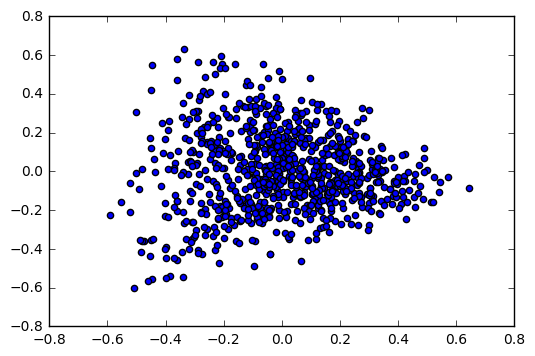

In [31]:
vectorizer.get_feature_names()
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline
x_train_pca = PCA(n_components = 2).fit_transform(X.toarray())
#x_train_pca = Normalizer(copy=False).fit_transform(x_train_pca)
p = plt.scatter(x = x_train_pca[:,0], y = x_train_pca[:,1])
p.show()

In [66]:
lsa = TruncatedSVD(n_components = 100, algorithm = 'arpack')
dtm_lsa = lsa.fit(X.toarray())
#dtm_lsa = Normalizer(copy=False).fit_transform(dtm_lsa)
dtm_lsa.components_[0]


array([ 0.03658567,  0.01563833,  0.01538041,  0.02165659,  0.02302362,
        0.0317661 ,  0.02105554,  0.03287356,  0.02839325,  0.01581018,
        0.03662128,  0.01605311,  0.09881284,  0.02878824,  0.04283833,
        0.0443599 ,  0.03882069,  0.01923879,  0.0245417 ,  0.02396981,
        0.02520204,  0.02861883,  0.03650413,  0.03857887,  0.03234562,
        0.02344834,  0.02881016,  0.05252481,  0.04874141,  0.03709569,
        0.04749904,  0.05235018,  0.01420982,  0.05797332,  0.02191219,
        0.03706322,  0.01643441,  0.10688196,  0.0674206 ,  0.04074479,
        0.03600455,  0.05415622,  0.03296435,  0.0645712 ,  0.01934593,
        0.02042051,  0.04421843,  0.02431042,  0.03031323,  0.02102652,
        0.02878228,  0.01618831,  0.03243175,  0.01948196,  0.07814497,
        0.06016291,  0.0140288 ,  0.01657354,  0.01443781,  0.02107926,
        0.01990538,  0.13157194,  0.03260802,  0.02945705,  0.03103261,
        0.01775218,  0.02100729,  0.01768902,  0.01756329,  0.02

In [67]:
terms = vectorizer.get_feature_names()
for i,comp in enumerate (dtm_lsa.components_):
    termsInComp = zip(terms,comp)
    sortedTerms = sorted(termsInComp,key = lambda x:x[1],reverse=True)[:10]
    print ("concept %d:"%i)
    for term in sortedTerms:
        print(term[0])

concept 0:
steak
good
fries
great
food
cheese
ordered
place
service
just
concept 1:
duck
fries
fat
cheese
mac
truffle
trio
filet
amazing
sauce
concept 2:
great
steak
best
vegas
amazing
awesome
place
service
fat
duck
concept 3:
steak
good
kobe
cap
beef
rib
wagyu
best
american
rare
concept 4:
good
great
service
really
bone
food
atmosphere
place
pretty
stars
concept 5:
duck
fat
fries
happy
hour
good
steak
burger
better
restaurant
concept 6:
cheese
mac
steak
truffle
best
ve
strip
medium
ribeye
restaurant
concept 7:
rib
cheese
mac
eye
aged
michael
mina
dry
foie
happy
concept 8:
amazing
kobe
place
good
vegas
love
delicious
burger
eat
got
concept 9:
foie
filet
gras
ve
mina
michael
best
wine
stripsteak
steakhouse
concept 10:
kobe
cap
mac
rib
burger
cheese
american
excellent
food
worth
concept 11:
best
happy
hour
foie
gras
wine
ve
meal
good
delicious
concept 12:
rib
best
ve
place
vegas
eye
wait
fries
duck
fat
concept 13:
foie
gras
steak
husband
delicious
marrow
night
bone
ordered
vegas
concept 

In [1]:
import json
from pprint import pprint

file =r"C:\Program Files\MongoDB\Server\3.4\bin\yelp_academic_dataset_business.json"

data_business = []
with open(file) as f:
    for line in f:
        data_business.append(json.loads(line))

In [2]:
def extract(business_id,file):
    data = []
    with open(file) as f:
        for line in f:
            temp = json.loads(line)
            if temp["business_id"] == business_id:
                data.append(temp)
    return data

In [3]:
data_business[21102]

{'attributes': {'Accepts Credit Cards': True,
  'Alcohol': 'full_bar',
  'Ambience': {'casual': False,
   'classy': False,
   'divey': False,
   'hipster': False,
   'intimate': False,
   'romantic': False,
   'touristy': False,
   'trendy': False,
   'upscale': True},
  'Attire': 'dressy',
  'BYOB': False,
  'BYOB/Corkage': 'yes_corkage',
  'Caters': False,
  'Corkage': True,
  'Delivery': False,
  'Good For': {'breakfast': False,
   'brunch': False,
   'dessert': False,
   'dinner': True,
   'latenight': False,
   'lunch': False},
  'Good For Groups': True,
  'Good for Kids': False,
  'Has TV': False,
  'Noise Level': 'average',
  'Outdoor Seating': False,
  'Parking': {'garage': True,
   'lot': False,
   'street': False,
   'valet': False,
   'validated': False},
  'Price Range': 4,
  'Take-out': False,
  'Takes Reservations': True,
  'Waiter Service': True,
  'Wheelchair Accessible': True,
  'Wi-Fi': 'no'},
 'business_id': 'XDYnLQC8ViZejuCDp4eCwg',
 'categories': ['Steakhouses', 'A

In [10]:
file_tip = r"C:\Program Files\MongoDB\Server\3.4\bin\yelp_academic_dataset_tip.json"
file_review = r"C:\Program Files\MongoDB\Server\3.4\bin\yelp_academic_dataset_review.json"
business_id = 'XDYnLQC8ViZejuCDp4eCwg' #stripsteak
data_tip = extract(business_id,file_tip)
data_review = extract(business_id,file_review)

In [13]:
data_tip

[{'business_id': 'XDYnLQC8ViZejuCDp4eCwg',
  'date': '2010-03-16',
  'likes': 0,
  'text': "Ask for Chris the bartender. He's great.",
  'type': 'tip',
  'user_id': '-m8iD48kKeEF2nmrGGaoUQ'},
 {'business_id': 'XDYnLQC8ViZejuCDp4eCwg',
  'date': '2010-03-26',
  'likes': 0,
  'text': 'Oysters,duck fries, prime rib,oh my!!!',
  'type': 'tip',
  'user_id': 'ca2Sa9Enqg2GlWFQ95p8bw'},
 {'business_id': 'XDYnLQC8ViZejuCDp4eCwg',
  'date': '2010-07-10',
  'likes': 0,
  'text': 'Ultra-modern, upscale, relaxing, and amazingly delicious.',
  'type': 'tip',
  'user_id': '4hSUrkyHHus6zWuRavOVKg'},
 {'business_id': 'XDYnLQC8ViZejuCDp4eCwg',
  'date': '2010-08-28',
  'likes': 0,
  'text': 'Happy birthday Andrew!!!',
  'type': 'tip',
  'user_id': 'blOLX71j68MUGhUUy6O8aA'},
 {'business_id': 'XDYnLQC8ViZejuCDp4eCwg',
  'date': '2010-10-09',
  'likes': 0,
  'text': 'Mac N cheese with the 12oz strip steak, service was good until my buddy said he wants fellatio from the waitress',
  'type': 'tip',
  'user_i

In [12]:
import pandas as pd
dataset=pd.DataFrame.from_dict(data_review)
print(dataset.head())

              business_id        date               review_id  stars  \
0  XDYnLQC8ViZejuCDp4eCwg  2006-12-02  MABh2ZIZMLX2H56Uu9A0NQ      5   
1  XDYnLQC8ViZejuCDp4eCwg  2007-02-03  gwUVP8wGhBESfQrXj8GRbA      4   
2  XDYnLQC8ViZejuCDp4eCwg  2007-02-04  T8LBmF3RgxoDihKvDuChmA      4   
3  XDYnLQC8ViZejuCDp4eCwg  2007-02-22  njhNzTvGXdwdYNj5OZU7yA      2   
4  XDYnLQC8ViZejuCDp4eCwg  2007-02-23  5RCgZOb6M7ZYOlr4hnY2OQ      5   

                                                text    type  \
0  Wow, and wow!  We arrived too late for dinner,...  review   
1  This is hands down one of the best steakhouse ...  review   
2  This is definitely a change from 3940. The ope...  review   
3  I have been in Las Vegas all week working NBA ...  review   
4  Well, the ambiance is wonderful but we were fo...  review   

                  user_id                                 votes  
0  aNaP7GNnL000JZ1kexjaew  {'cool': 1, 'funny': 1, 'useful': 0}  
1  lgFjLzDH7nDwUzRLNoqQuQ  {'cool': 0, 'funny': 0,

In [14]:
def extract5(stars):
    data5 = []
    for line in data_review :
            
            if line['stars'] ==5:
                data5.append(line)
    return data5
   
def extract4(stars):
    data4 = []
    for line in data_review :
            
            if line['stars'] ==4:
                data4.append(line)
                
    return data4

def extract3(stars):
    data3 = []
    for line in data_review :
            
            if line['stars'] ==3:
                data3.append(line)
                
    return data3


def extract2(stars):
    data2 = []
    for line in data_review :
            
            if line['stars'] ==2:
                data2.append(line)
                
    return data2

def extract1(stars):
    data1 = []
    for line in data_review :
            
            if line['stars'] ==1:
                data1.append(line)
                
    return data1
five=extract5(5)
print(len(five))
four=extract4(4)
print(len(four))
three=extract3(3)
two=extract2(2)
one=extract1(1)



print(len(three))
print(len(two))
print(len(one))


396
229
103
79
47


In [15]:
data=dataset['text']
#print(dataset['text'])
target=dataset['stars']
#print(dataset['stars'])
import sys
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV
from sklearn.datasets import load_files
from sklearn.cross_validation import train_test_split
from sklearn import metrics
import numpy as np
data_train, data_test, y_train, y_test = train_test_split(data,target, test_size=0.25, random_state=1)
#print(data_train)
#print(data_test)
#print(y_train)
print(type(y_test))

<class 'pandas.core.series.Series'>


In [16]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
import numpy as np
from sklearn import svm
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

text_clf = Pipeline([('vect', CountVectorizer(ngram_range = (1, 2))),
                     ('tfidf', TfidfTransformer(use_idf = True)),
                      ('clf', SGDClassifier(loss='hinge', alpha=1e-4, n_iter=5, random_state=42)),
                     ])


text_clf = text_clf.fit(data_train, y_train)


predicted = text_clf.predict(data_test)
#np.mean(predicted == y_test)
#print(predicted)
#print(np.mean(predicted == y_test))
#print(metrics.classification_report(y_test, predicted))
print(metrics.accuracy_score(y_test,predicted))
confusion_matrix(y_test, predicted)

0.61214953271


array([[  0,   1,   2,   0,   1],
       [  1,  11,   2,   3,   0],
       [  0,  10,   7,   6,   9],
       [  0,   3,   4,  12,  28],
       [  2,   5,   1,   5, 101]])

In [18]:
test = np.array(["bad worst resturant ever..will never visit.. its  sad"])


In [21]:
from sklearn.grid_search import GridSearchCV
parameters = {'vect__ngram_range': [(1, 1), (1, 2)],
              'tfidf__use_idf': (True, False),
               'clf__alpha': (1e-2, 1e-3),
}

In [22]:
gs_clf = GridSearchCV(text_clf, parameters, n_jobs=-1)

In [23]:
gs_clf = gs_clf.fit(data_train[:400], y_train[:400])

In [24]:
y_train[gs_clf.predict(['didnt like  the food.really bad service,disappointed'])[0]]

4

In [25]:
gs_clf.best_score_  

0.52249999999999996

In [26]:
for param_name in sorted(parameters.keys()):
    print("%s: %r" % (param_name, gs_clf.best_params_[param_name]))

clf__alpha: 0.001
tfidf__use_idf: False
vect__ngram_range: (1, 2)
